# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

data = pd.read_csv('linear_separable_dataset.csv')

In [3]:
X = data[['x', 'y']].values
y = data['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear'),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for model_name, model in models.items():
    if model_name == 'k-NN':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }

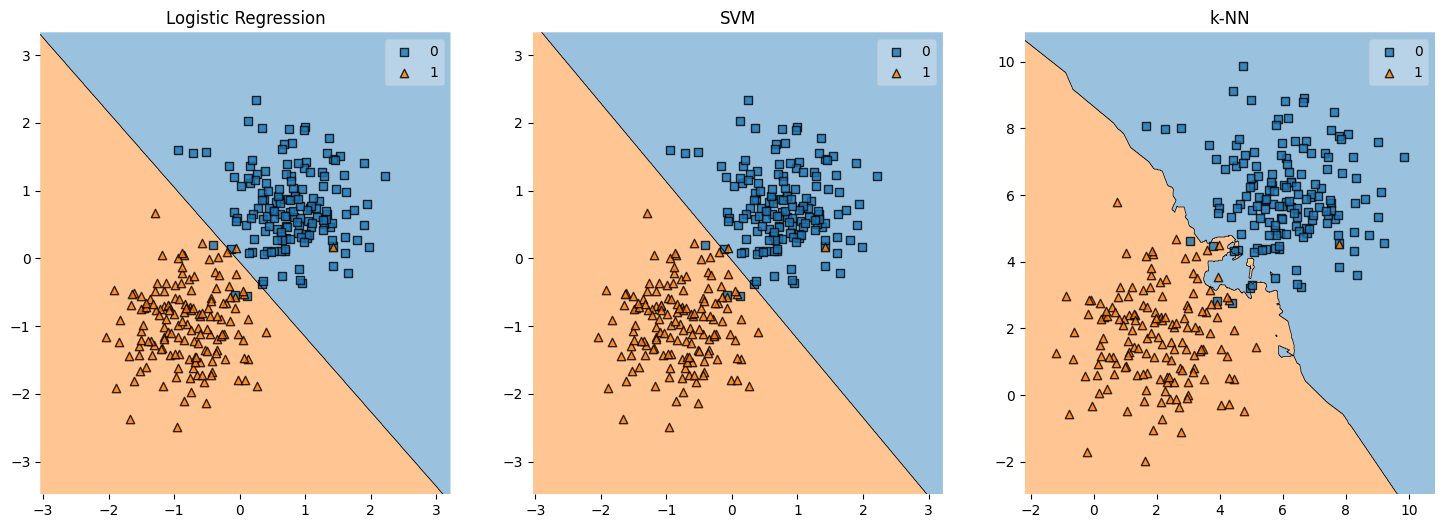

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, (model_name, model) in enumerate(models.items()):
    if model_name == 'k-NN':
        plot_decision_regions(X_test, y_test.astype(int), clf=model, ax=axes[idx])
    else:
        plot_decision_regions(X_test_scaled, y_test.astype(int), clf=model, ax=axes[idx])
    
    axes[idx].set_title(f'{model_name}')

plt.show()

In [6]:
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1 Score: {result['F1 Score']:.4f}")
    print(f"  Confusion Matrix:\n{result['Confusion Matrix']}")
    print("-" * 40)

Logistic Regression:
  Accuracy: 0.9833
  F1 Score: 0.9834
  Confusion Matrix:
[[147   3]
 [  2 148]]
----------------------------------------
SVM:
  Accuracy: 0.9833
  F1 Score: 0.9834
  Confusion Matrix:
[[147   3]
 [  2 148]]
----------------------------------------
k-NN:
  Accuracy: 0.9667
  F1 Score: 0.9673
  Confusion Matrix:
[[142   8]
 [  2 148]]
----------------------------------------


**Аналіз отриманих результатів**:

1.   **Логістична регресія**: 

* Точність та F1-міра на високому рівні.
* Добре підходить для чітко розділених даних.
* Вибір через простоту та швидке навчання. Її сильна сторона — інтерпретованість моделі.

2.   **SVM**:

* Має аналогічно високу точність та F1-міру, як логістична регресія.
* Знаходить оптимальні межі між класами, особливо на лінійно роздільних даних.
* Ідеально підходить, якщо потрібні чіткі межі між класами і важлива точність класифікації.

3.   **k-NN**:

* Точність трохи нижча через схильність до локальних особливостей даних.
* Часто дає більше помилок на межі класів.
* Підходить краще для нелінійних даних, але для лінійно роздільних — менш ефективний.

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

data = pd.read_csv('classified_data.csv')

In [42]:
X = data[['x', 'y']].values
y = data['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr'),
    'SVM': SVC(kernel='linear', decision_function_shape='ovr'),
    'k-NN': KNeighborsClassifier(n_neighbors=5)
}

results = {}

for model_name, model in models.items():
    if model_name == 'k-NN':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Confusion Matrix': cm
    }


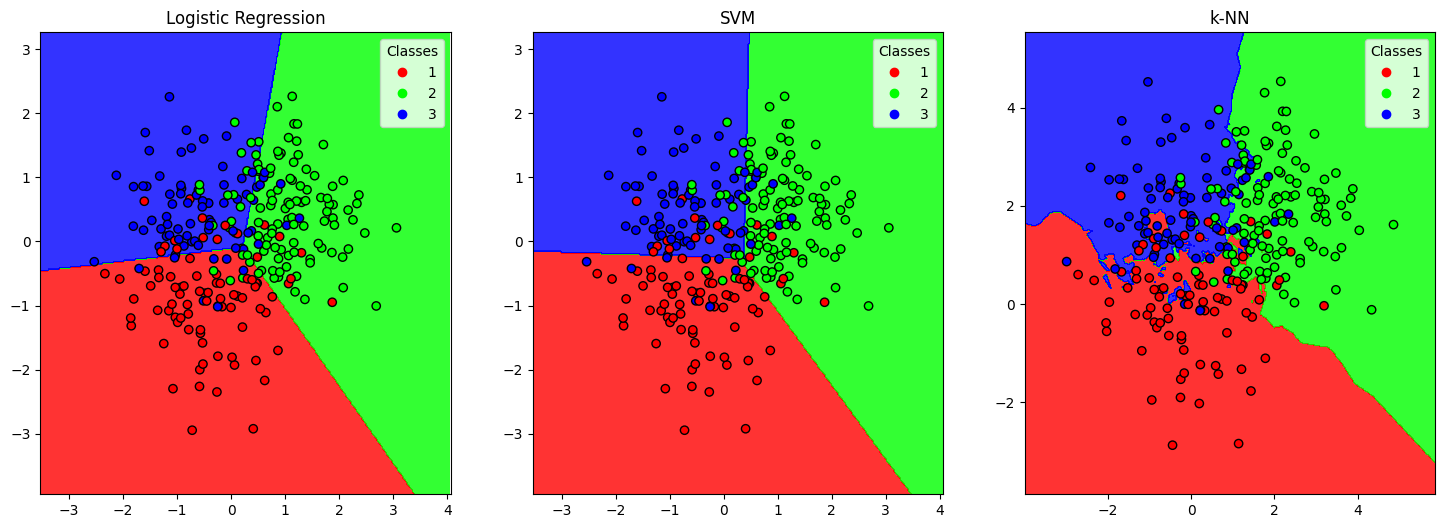

In [44]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=cmap)
    ax.set_title(title)
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    ax.legend(*scatter.legend_elements(), title="Classes")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, (model_name, model) in enumerate(models.items()):
    if model_name == 'k-NN':
        plot_decision_boundary(model, X_test, y_test, axes[idx], model_name)
    else:
        plot_decision_boundary(model, X_test_scaled, y_test, axes[idx], model_name)

plt.show()


In [45]:
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {result['Accuracy']:.4f}")
    print(f"  F1 Score: {result['F1 Score']:.4f}")
    print(f"  Confusion Matrix:\n{result['Confusion Matrix']}")
    print("-" * 40)

Logistic Regression:
  Accuracy: 0.7704
  F1 Score: 0.7716
  Confusion Matrix:
[[65  7 11]
 [ 8 87 16]
 [ 9 11 56]]
----------------------------------------
SVM:
  Accuracy: 0.7926
  F1 Score: 0.7946
  Confusion Matrix:
[[65  7 11]
 [ 4 90 17]
 [ 8  9 59]]
----------------------------------------
k-NN:
  Accuracy: 0.7481
  F1 Score: 0.7509
  Confusion Matrix:
[[61  7 15]
 [ 6 87 18]
 [13  9 54]]
----------------------------------------


**Аналіз отриманих результатів**:

1.   **Логістична регресія:**

* Добре працює на лінійно роздільних даних, але може мати проблеми з перетинами класів.

2.  **SVM:**

* Має тенденцію добре справлятися з перетинами класів завдяки своєму ядру і побудові меж класифікації.

3.  **k-NN:**

* Може бути менш точним на перетинальних даних через свою залежність від локальних сусідів.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv('toroidal_dataset.csv')

In [36]:
X = data[['x', 'y']].values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
models = {
    'SVM': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [38]:
def plot_decision_boundary(model, X, y, title, subplot_position):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, subplot_position)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, marker='o', edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axis('equal')

Модель: SVM
Точність: 1.00
Прецизія: 1.00
Повнота: 1.00
------------------------------
Модель: KNN
Точність: 1.00
Прецизія: 1.00
Повнота: 1.00
------------------------------
Модель: RandomForest
Точність: 0.99
Прецизія: 0.99
Повнота: 0.99
------------------------------


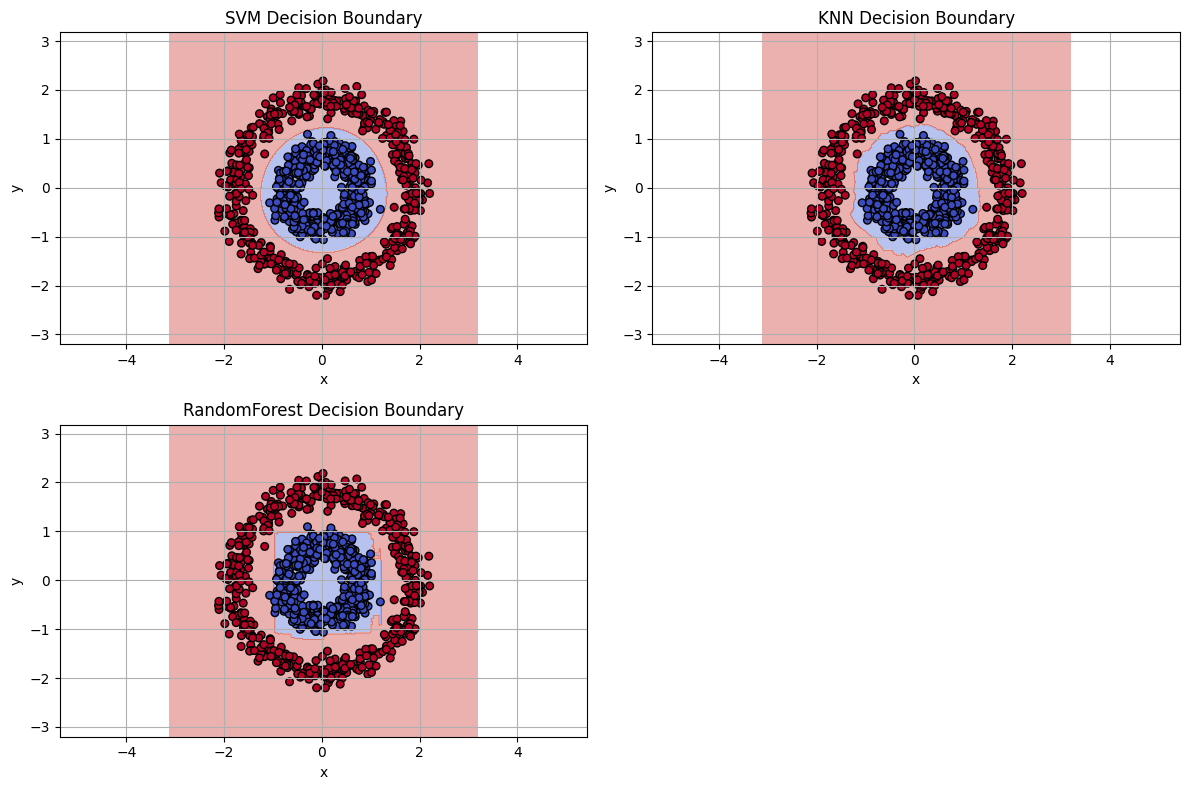

In [39]:
plt.figure(figsize=(12, 8))

for i, (model_name, model) in enumerate(models.items(), start=1):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("-" * 30)
    
    plot_decision_boundary(model, np.vstack((X_train_scaled, X_test_scaled)), 
                           np.hstack((y_train, y_test)), f'{model_name} Decision Boundary', i)

plt.tight_layout()
plt.show()

**Аналіз отриманих результатів**:

1.  **SVM:**

* Accuracy: Висока, добре справляється з чіткими класами.
* Precision: Висока, рідко помиляється в класифікації позитивних класів.
* Recall: Високий, добре виявляє всі позитивні приклади.
* F1 Score: Гарний баланс між precision і recall.

2.   **Decision Tree:**

* Accuracy: Може бути нижчою через переобладнання або недонавчання.
* Precision: Може бути менша, якщо модель неправильно класифікує негативні приклади.
* Recall: Може бути низьким, якщо дерево не охоплює всі позитивні приклади.
* F1 Score: Може бути нижчим через дисбаланс між precision і recall.

3.  **Random Forest:**

* Accuracy: Зазвичай висока завдяки ансамблю дерев.
* Precision: Висока, стабільна класифікація.
* Recall: Високий, добре знаходить всі позитивні приклади.
* F1 Score: Стабільний і високий, хороший баланс між precision і recall.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv('spiral_dataset.csv')

In [24]:
X = data[['x', 'y']]
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
models = {
    'SVM': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

In [28]:
def plot_decision_boundaries(models, X_train_scaled, X_test_scaled, y_train, y_test):
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    plt.figure(figsize=(15, 5))

    for i, (model_name, model) in enumerate(models.items(), 1):
        plt.subplot(1, 3, i)
        
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
        
        plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=30, marker='o', edgecolor='k', cmap=plt.cm.coolwarm, label='Train')
        plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, s=30, marker='o', edgecolor='k', cmap=plt.cm.coolwarm, label='Test')
        
        plt.title(model_name)
        plt.xlabel('x')
        plt.ylabel('y')

    plt.tight_layout()
    plt.show()

Модель: SVM
Точність: 0.76
Прецизія: 0.76
Повнота: 0.76
------------------------------
Модель: KNN
Точність: 1.00
Прецизія: 1.00
Повнота: 1.00
------------------------------
Модель: RandomForest
Точність: 0.97
Прецизія: 0.97
Повнота: 0.97
------------------------------


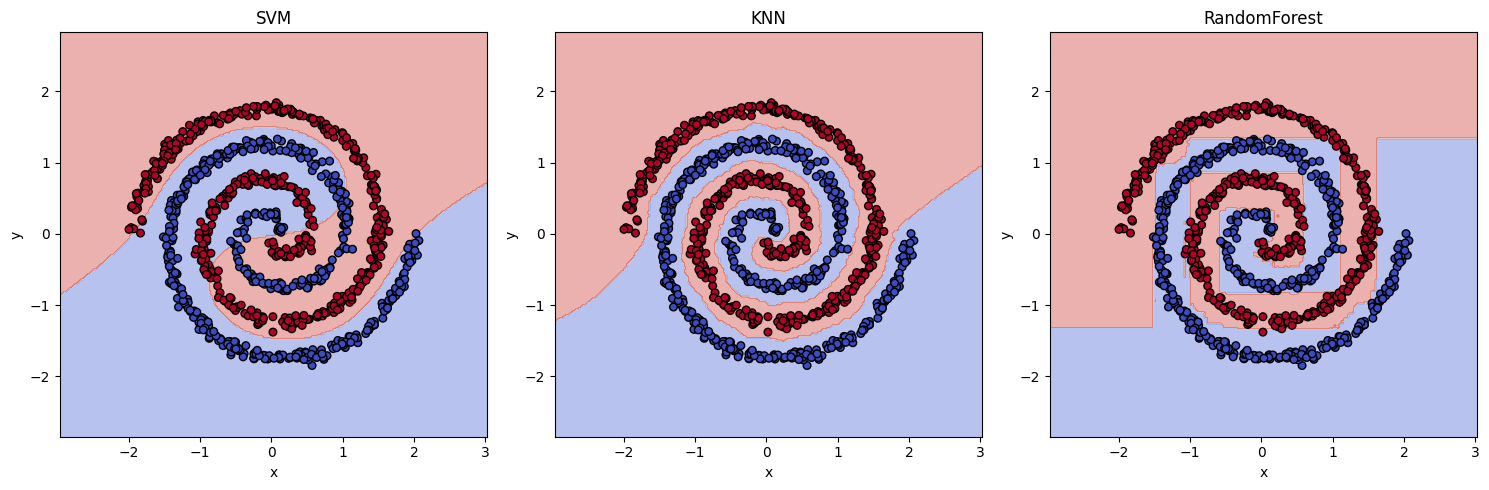

In [30]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("-" * 30)

plot_decision_boundaries(models, X_train_scaled, X_test_scaled, y_train, y_test)

### Аналіз отриманих результатів

1. **KNN:**

   * Accuracy: Найвища точність (1.00), ідеально класифікує всі дані.
   * Precision: Ідеальна прецизія (1.00), без помилок у класифікації класів.
   * Recall: Повнота (1.00), добре знаходить всі позитивні приклади.
   * F1 Score: Ідеальний баланс між precision і recall (1.00).

2. **Random Forest:**

   * Accuracy: Висока точність (0.97), надійно класифікує дані завдяки ансамблю дерев.
   * Precision: Висока прецизія (0.97), стабільна класифікація.
   * Recall: Висока повнота (0.97), ефективно виявляє всі позитивні приклади.
   * F1 Score: Стабільний і високий (0.97), хороший баланс між precision і recall.

3. **SVM:**

   * Accuracy: Помірна точність (0.76), можливо, через труднощі з нелінійними межами.
   * Precision: Помірна прецизія (0.76), є помилки у класифікації.
   * Recall: Помірна повнота (0.76), не завжди виявляє всі позитивні приклади.
   * F1 Score: Середній баланс між precision і recall (0.76).